In [1]:


%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (350, 350)
IPythonConsole.drawOptions.addAtomIndices = True
from openchemie import OpenChemIE
from PIL import Image
import numpy as np
from rdkit.Chem import AllChem
import cv2
import re
import torch
from openchemie import utils



import json
import copy

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = OpenChemIE(device = torch.device('cuda'))

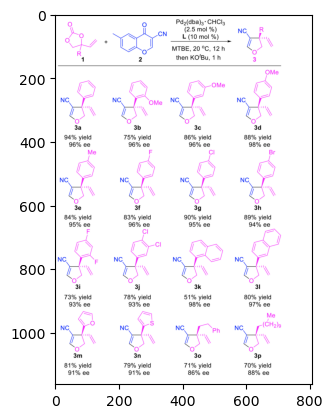

In [3]:
file_name = 'acs.joc.3c00976 example 1.png'

image_file = '../data/' + file_name

image = Image.open(image_file)

image_np = np.array(image)

plt.imshow(image_np)
plt.show()

In [4]:
results = model.extract_reactions_from_figures([image_np])

coref_results = model.extract_molecule_corefs_from_figures([image_np])

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATe

Inspect the RxnScribe Outputs

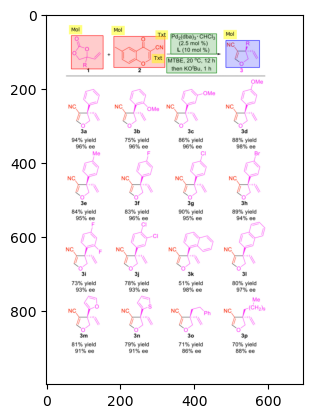

In [5]:
output = model.rxnscribe.draw_predictions(results[0]['reactions'], image_file = image_file)
plt.imshow(output[0])

{'C=C[C@]1(c2ccc(F)cc2F)COC=C1C#N': ['3i'], 'C=C[C@]1(c2ccc(C)cc2)COC=C1C#N': ['3e'], 'C=C[C@]1(c2ccccc2)COC=C1C#N': ['3a'], 'C=C[C@]1(c2ccco2)COC=C1C#N': ['3m'], '*C1(C=C)COC(=O)O1': ['1'], 'C=C[C@]1(c2ccccc2OC)COC=C1C#N': ['3b'], 'Cc1ccc2occ(C#N)c(=O)c2c1': ['2'], 'C=C[C@]1(c2ccc(Cl)c(Cl)c2)COC=C1C#N': ['3j'], 'C=C[C@]1(c2cccs2)COC=C1C#N': ['3n'], 'C=C[C@]1(c2ccc(F)cc2)COC=C1C#N': ['3f'], 'C=C[C@]1(c2cccc(OC)c2)COC=C1C#N': ['3c'], 'C=C[C@]1(c2cccc3ccccc23)COC=C1C#N': ['3k'], 'C=C[C@]1(CCc2ccccc2)COC=C1C#N': ['30'], 'C=C[C@]1(c2ccc(Cl)cc2)COC=C1C#N': ['39'], 'C=C[C@]1(C*C)COC=C1C#N': ['3p'], 'C=C[C@]1(c2ccc3ccccc3c2)COC=C1C#N': ['31'], 'C=C[C@]1(c2ccc(OC)cc2)COC=C1C#N': ['3d'], '*[C@@]1(C=C)COC=C1C#N': ['3'], 'C=C[C@]1(c2ccc(Br)cc2)COC=C1C#N': ['3h']}


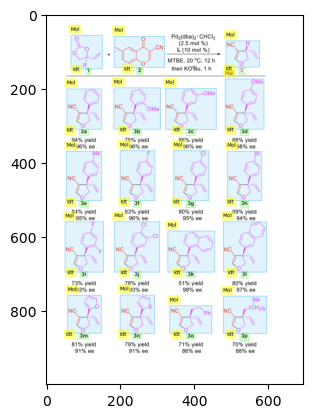

In [6]:
coref_output = model.moldet.draw_bboxes(coref_results[0], image_file = image_file, coref = True)

plt.imshow(coref_output[0])

coref_results_dict = {coref_results[0]['bboxes'][coref[0]]['smiles']: coref_results[0]['bboxes'][coref[1]]['text']  for coref in coref_results[0]['corefs']}

print(coref_results_dict)

*C1(C=C)COC(=O)O1


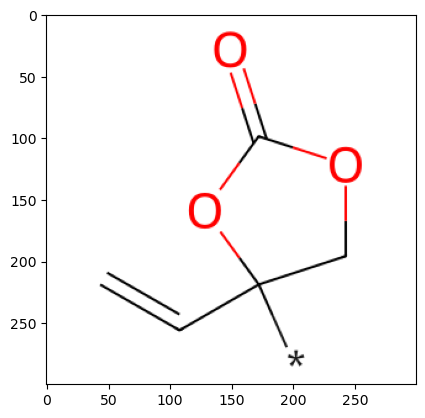

Cc1ccc2occ(C#N)c(=O)c2c1


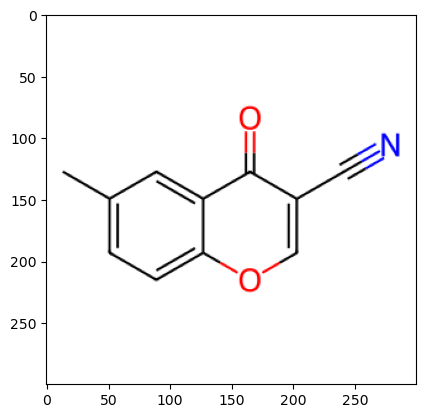

*[C@@]1(C=C)COC=C1C#N


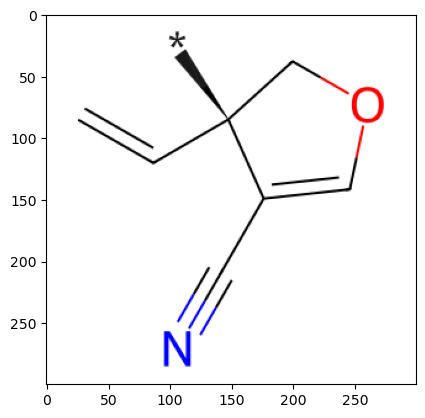

In [8]:
reactants_array = []
products = []

for reactant in results[0]['reactions'][0]['reactants']:
    print(reactant['smiles'])
    reactants_array.append(reactant['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(reactant['smiles']))
    plt.imshow(i)
    plt.show()
for product in results[0]['reactions'][0]['products']:
    print(product['smiles'])
    products.append(product['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(product['smiles']))
    plt.imshow(i)
    plt.show()

backout the reactants and do manual evaluation

In [9]:
backed_out = utils.backout(results, coref_results)

In [10]:
backed_out

[(['C=CC1(c2ccc(F)cc2F)COC(=O)O1', 'Cc1ccc2occ(C#N)c(=O)c2c1'], '3i'),
 (['C=CC1(c2ccc(C)cc2)COC(=O)O1', 'Cc1ccc2occ(C#N)c(=O)c2c1'], '3e'),
 (['C=CC1(c2ccccc2)COC(=O)O1', 'Cc1ccc2occ(C#N)c(=O)c2c1'], '3a'),
 (['C=CC1(c2ccco2)COC(=O)O1', 'Cc1ccc2occ(C#N)c(=O)c2c1'], '3m'),
 (['C=CC1(c2ccccc2OC)COC(=O)O1', 'Cc1ccc2occ(C#N)c(=O)c2c1'], '3b'),
 (['C=CC1(c2ccc(Cl)c(Cl)c2)COC(=O)O1', 'Cc1ccc2occ(C#N)c(=O)c2c1'], '3j'),
 (['C=CC1(c2cccs2)COC(=O)O1', 'Cc1ccc2occ(C#N)c(=O)c2c1'], '3n'),
 (['C=CC1(c2ccc(F)cc2)COC(=O)O1', 'Cc1ccc2occ(C#N)c(=O)c2c1'], '3f'),
 (['C=CC1(c2cccc(OC)c2)COC(=O)O1', 'Cc1ccc2occ(C#N)c(=O)c2c1'], '3c'),
 (['C=CC1(c2cccc3ccccc23)COC(=O)O1', 'Cc1ccc2occ(C#N)c(=O)c2c1'], '3k'),
 (['C=CC1(C*C)COC(=O)O1', 'Cc1ccc2occ(C#N)c(=O)c2c1'], '3p'),
 (['C=CC1(c2ccc(OC)cc2)COC(=O)O1', 'Cc1ccc2occ(C#N)c(=O)c2c1'], '3d'),
 (['C=CC1(c2ccc(Br)cc2)COC(=O)O1', 'Cc1ccc2occ(C#N)c(=O)c2c1'], '3h')]

these are the predicted reactants corresponding the product with label 3i
C=CC1(c2ccc(F)cc2F)COC(=O)O1


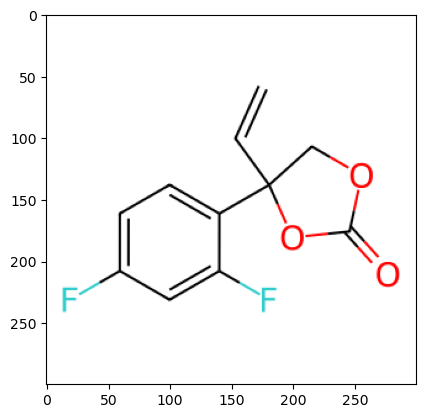

Cc1ccc2occ(C#N)c(=O)c2c1


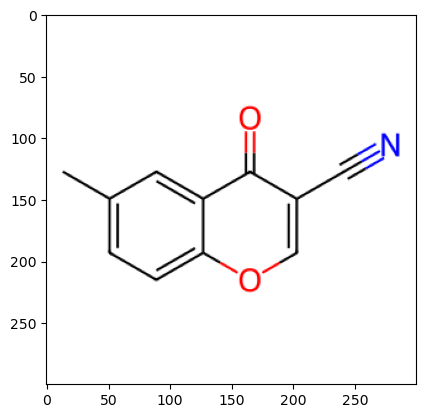

these are the predicted reactants corresponding the product with label 3e
C=CC1(c2ccc(C)cc2)COC(=O)O1


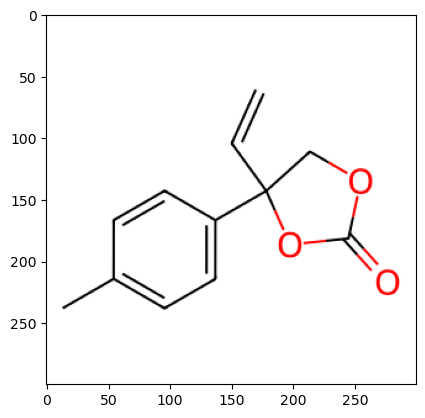

Cc1ccc2occ(C#N)c(=O)c2c1


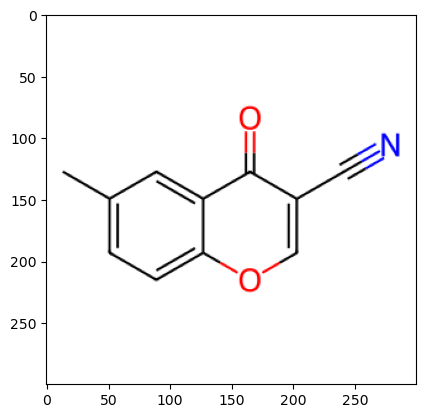

these are the predicted reactants corresponding the product with label 3a
C=CC1(c2ccccc2)COC(=O)O1


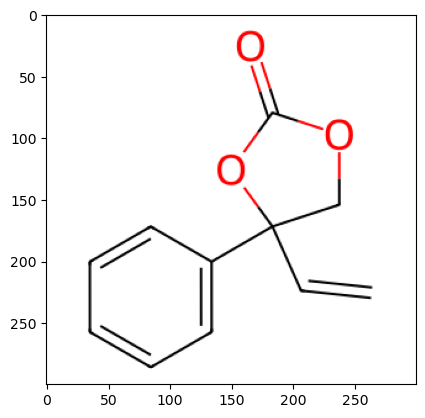

Cc1ccc2occ(C#N)c(=O)c2c1


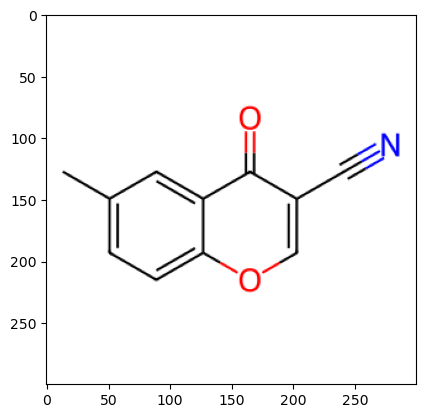

these are the predicted reactants corresponding the product with label 3m
C=CC1(c2ccco2)COC(=O)O1


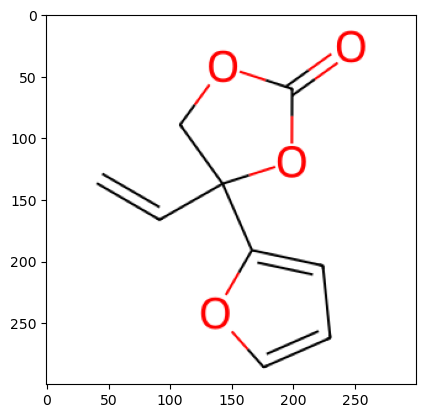

Cc1ccc2occ(C#N)c(=O)c2c1


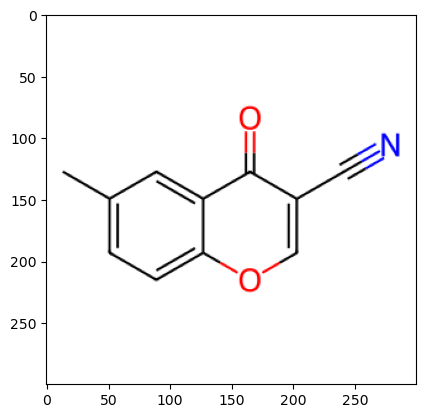

these are the predicted reactants corresponding the product with label 3b
C=CC1(c2ccccc2OC)COC(=O)O1


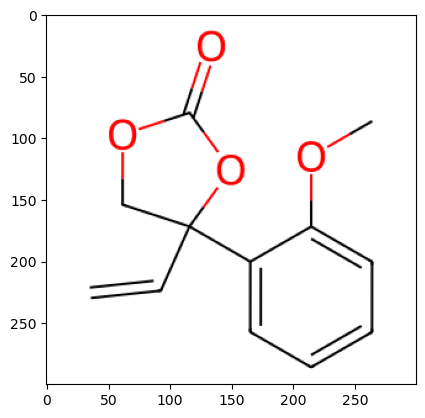

Cc1ccc2occ(C#N)c(=O)c2c1


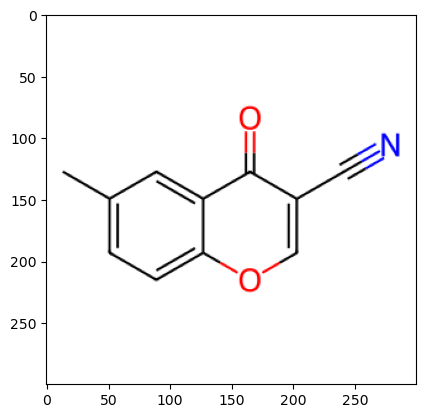

these are the predicted reactants corresponding the product with label 3j
C=CC1(c2ccc(Cl)c(Cl)c2)COC(=O)O1


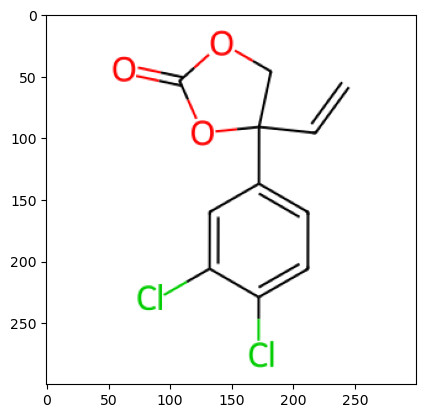

Cc1ccc2occ(C#N)c(=O)c2c1


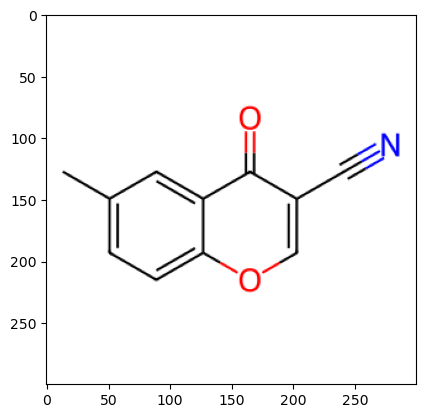

these are the predicted reactants corresponding the product with label 3n
C=CC1(c2cccs2)COC(=O)O1


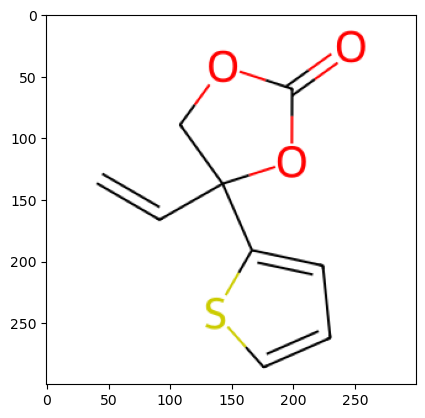

Cc1ccc2occ(C#N)c(=O)c2c1


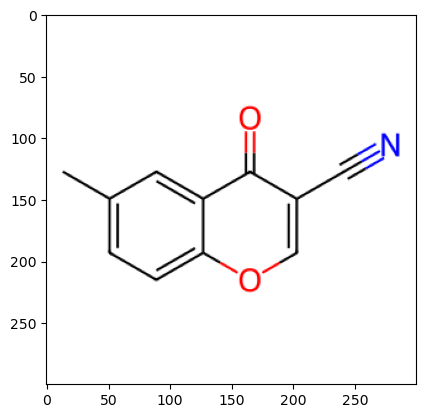

these are the predicted reactants corresponding the product with label 3f
C=CC1(c2ccc(F)cc2)COC(=O)O1


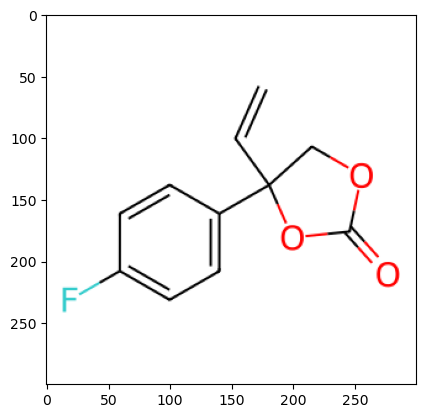

Cc1ccc2occ(C#N)c(=O)c2c1


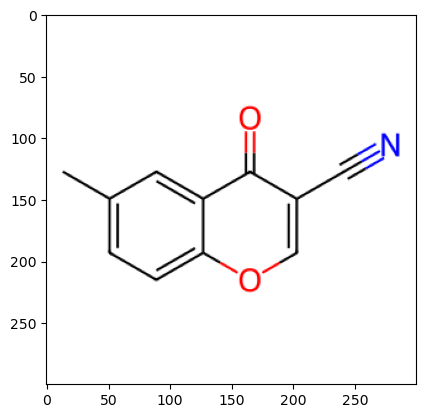

these are the predicted reactants corresponding the product with label 3c
C=CC1(c2cccc(OC)c2)COC(=O)O1


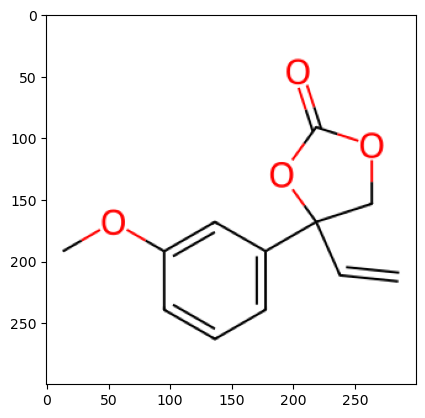

Cc1ccc2occ(C#N)c(=O)c2c1


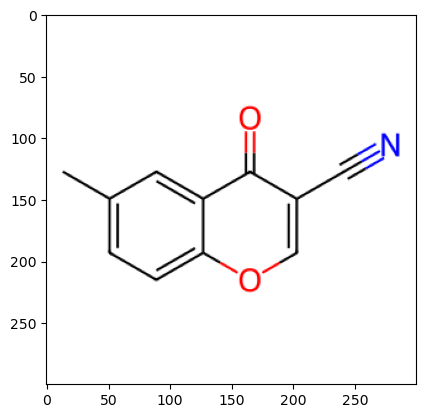

these are the predicted reactants corresponding the product with label 3k
C=CC1(c2cccc3ccccc23)COC(=O)O1


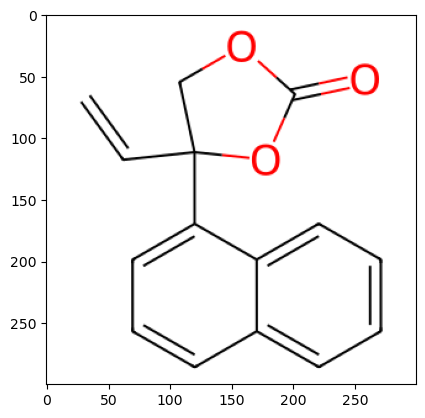

Cc1ccc2occ(C#N)c(=O)c2c1


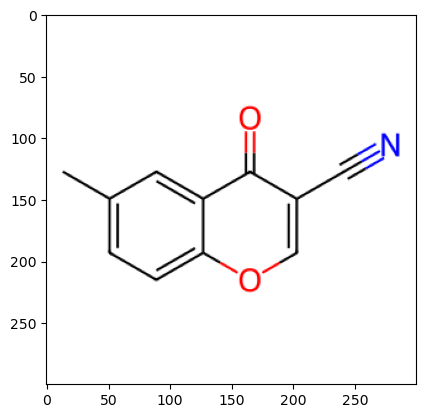

these are the predicted reactants corresponding the product with label 3p
C=CC1(C*C)COC(=O)O1


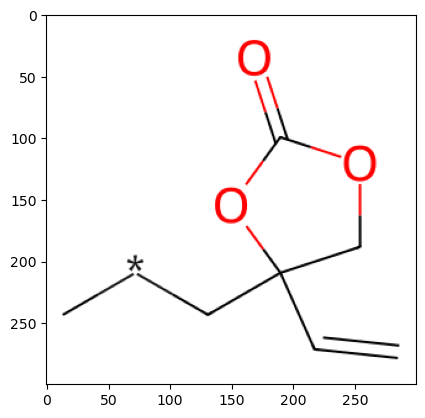

Cc1ccc2occ(C#N)c(=O)c2c1


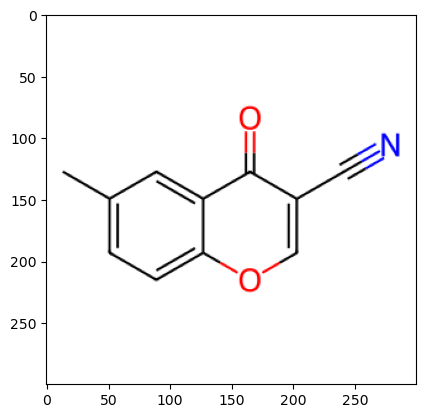

these are the predicted reactants corresponding the product with label 3d
C=CC1(c2ccc(OC)cc2)COC(=O)O1


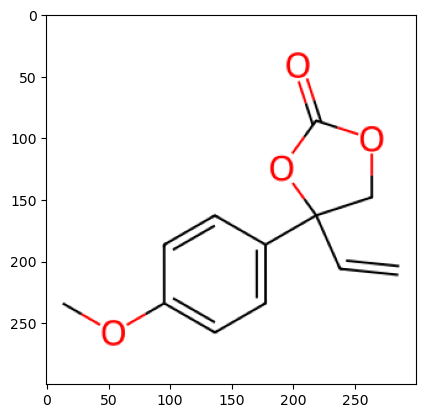

Cc1ccc2occ(C#N)c(=O)c2c1


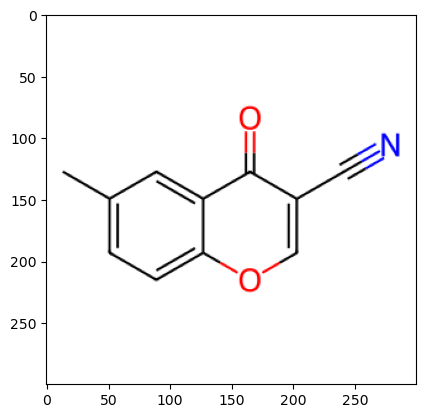

these are the predicted reactants corresponding the product with label 3h
C=CC1(c2ccc(Br)cc2)COC(=O)O1


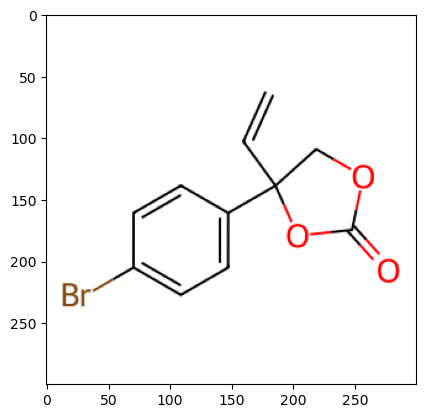

Cc1ccc2occ(C#N)c(=O)c2c1


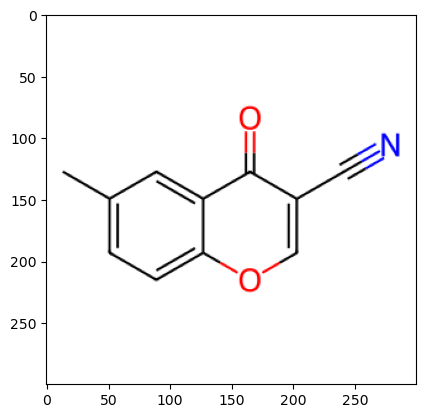

In [11]:
extracted_reactants = {}

for reactants, _, label in backed_out:
    print(f'these are the predicted reactants corresponding the product with label {label}')
    extracted_reactants[label] = []
    for molecule in reactants:
        print(molecule)
        extracted_reactants[label].append(molecule)
        i = Draw.MolToImage(Chem.MolFromSmiles(molecule))
        plt.imshow(i)
        plt.show()

backout results:

3a yes
3b yes
3c yes
3d yes
3e yes
3f yes
3g no
3h yes 
3i yes
3j yes
3k yes
3l no
3m yes
3n yes
3o no
3p wrong

precision 12/16 recall 12/13